In [20]:
import pandas as pd 

file_path = '../LA_CRIME.csv'

df = pd.read_csv(file_path)


In [21]:
df.dtypes

dr_no             int64
DATE OCC         object
TIME OCC          int64
AREA NAME        object
Crm Cd            int64
Crm Cd Desc      object
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Desc      object
Weapon Desc      object
location         object
lat             float64
long            float64
dtype: object

In [22]:
#Create a correlation matrix

corr_columns = ['TIME OCC', 'Vict Age', 'lat', 'long']
corr_df = df[corr_columns]

corr_matrix = corr_df.corr()

print(corr_matrix)

          TIME OCC  Vict Age       lat      long
TIME OCC  1.000000 -0.034538  0.002768 -0.002573
Vict Age -0.034538  1.000000  0.000775  0.000580
lat       0.002768  0.000775  1.000000 -0.998473
long     -0.002573  0.000580 -0.998473  1.000000


/Users/lucasdeblock/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


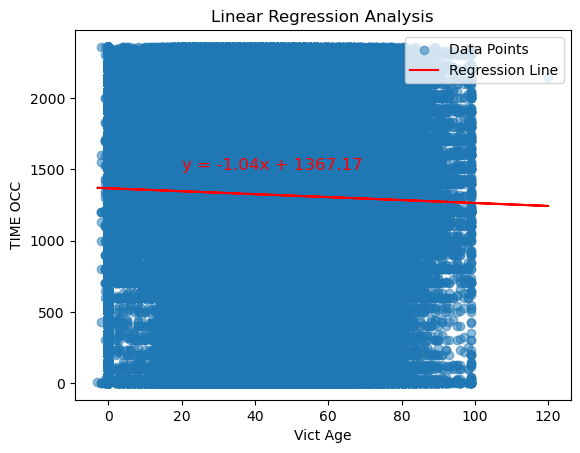

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df[['Vict Age']]  
y = df['TIME OCC']    

model = LinearRegression()

# Fit the model 
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, label='Data Points', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Regression Line')

equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.text(20, 1500, equation, fontsize=12, color='red')

plt.xlabel('Vict Age')
plt.ylabel('TIME OCC')
plt.legend()
plt.title('Linear Regression Analysis')
plt.show()

In [29]:
#There is a slightly significant correlation between age and occurance of the crime. It seems that younger vicitms are more likely to be attacked later during the day. Though as youn can see many people are attacked throughout the day.

uni_CrimeCodes = df['Crm Cd Desc']

uni_CrimeCodes = uni_CrimeCodes.unique()

len_uni_codes = len(uni_CrimeCodes)

print('The number of unique LA Crime Codes are: ', len_uni_codes)



The number of unique LA Crime Codes are:  138


In [39]:
Sex_Analysis = df['Vict Sex'] 

Sex_Counts = Sex_Analysis.value_counts()

Total = len(Sex_Analysis)

print(f'Total number of Victims are {Total} \n\n{Sex_Counts}')

Total number of Victims are 857658 

Vict Sex
M    353155
F    315099
X     76060
H        93
-         1
Name: count, dtype: int64


In [44]:
M = 353155
F = 315099
X = 76060

M_Ratio = round(M/Total,2)
F_Ratio = round(F/Total,2)
X_Ratio = round(X/Total,2)
print(f'Male Vicitms {M_Ratio} \n\nFemale Victims {F_Ratio} \n\nUndisclosed {X_Ratio}')

Male Vicitms 0.41 

Female Victims 0.37 

Undisclosed 0.09


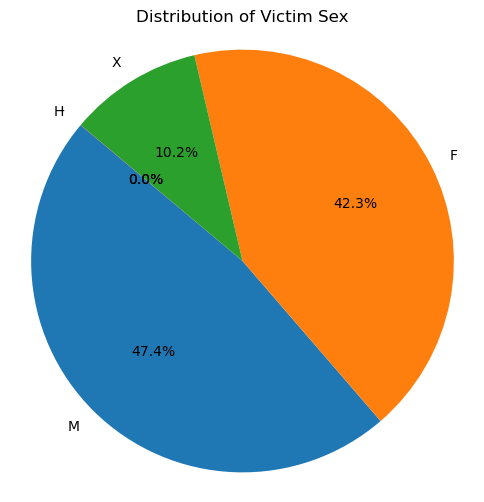

In [45]:
# pie chart
plt.figure(figsize=(6, 6))  
plt.pie(Sex_Counts, labels=Sex_Counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Victim Sex')

plt.axis('equal')  
plt.show()